## Clothing Store
### - _Ankur Patel_

### Introduction:

The Clothing_store_training_test data set contains information about customers on the 119 variables. The target variable is the Response of 1 or 0, which is True or False. A classification model will be developed to maximize profits for direct-mail marketing.

### Preprocessing:

In [1]:
# read library
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
# reading the clothing_store_training_test dataset
df = read.csv(file.choose())
head(df)

HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,ln.lifetime.ave.time.betw.visits,ln.product.uniformity,sqrt.responded,flag.returns,flag.response.rate,flag.markdown,sqrt.spending.months.2.3,sqrt.spending.months.4.5.6,flag.spending.months.4.5.6,flag.spending.months.2.3
9.9556e+12,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,4.709530,3.459781,0.000000,FALSE,FALSE,TRUE,0.000000,0.000000,FALSE,FALSE
9.9556e+12,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,3.772761,3.487987,1.414214,TRUE,TRUE,TRUE,9.055937,10.954451,TRUE,TRUE
9.9556e+12,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,4.228293,4.605170,0.000000,FALSE,FALSE,TRUE,0.000000,0.000000,FALSE,FALSE
9.9556e+12,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,3.294354,3.147165,2.449490,FALSE,TRUE,TRUE,10.244023,16.399085,TRUE,TRUE
9.9556e+12,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,3.198673,3.350606,0.000000,FALSE,FALSE,TRUE,9.350936,0.000000,FALSE,TRUE
9.9556e+12,1106,26,2,120.00,0,60.00,11,0.00,0.56,...,4.283587,3.888550,0.000000,FALSE,FALSE,TRUE,0.000000,7.615773,TRUE,FALSE


In [3]:
# dataset size and datatype of variables
str(df)

'data.frame':	2847 obs. of  119 variables:
 $ HHKEY                           : num  9.96e+12 9.96e+12 9.96e+12 9.96e+12 9.96e+12 ...
 $ ZIP_CODE                        : int  1001 1028 1056 1118 1107 1106 1108 1106 1118 1106 ...
 $ REC                             : int  208 6 327 66 49 26 98 64 145 356 ...
 $ FRE                             : int  2 4 2 8 1 2 3 5 1 1 ...
 $ MON                             : num  368.5 258 77 846.1 87.4 ...
 $ CC_CARD                         : int  0 1 0 1 0 0 0 1 1 0 ...
 $ AVRG                            : num  184.2 64.5 38.5 105.8 87.4 ...
 $ PC_CALC20                       : int  11 11 11 11 11 11 11 11 11 11 ...
 $ PSWEATERS                       : num  0.18 0.26 1 0.38 0.2 0 0.16 0.16 0.12 0 ...
 $ PKNIT_TOPS                      : num  0 0.16 0 0 0.2 0.56 0.06 0.07 0 0 ...
 $ PKNIT_DRES                      : num  0 0 0 0.05 0 0 0 0 0 0 ...
 $ PBLOUSES                        : num  0.3 0 0 0.06 0 0 0 0.05 0 0 ...
 $ PJACKETS                    

In [4]:
# drop any incomplete records
df = df[complete.cases(df),]

In [5]:
# variables
colnames(df)

[1] "HHKEY"                            "ZIP_CODE"                        
  [3] "REC"                              "FRE"                             
  [5] "MON"                              "CC_CARD"                         
  [7] "AVRG"                             "PC_CALC20"                       
  [9] "PSWEATERS"                        "PKNIT_TOPS"                      
 [11] "PKNIT_DRES"                       "PBLOUSES"                        
 [13] "PJACKETS"                         "PCAR_PNTS"                       
 [15] "PCAS_PNTS"                        "PSHIRTS"                         
 [17] "PDRESSES"                         "PSUITS"                          
 [19] "POUTERWEAR"                       "PJEWELRY"                        
 [21] "PFASHION"                         "PLEGWEAR"                        
 [23] "PCOLLSPND"                        "AMSPEND"                         
 [25] "PSSPEND"                          "CCSPEND"                         
 [27] "AXSPEND"                          "TMONSPEND"                       
 [29] "OMONSPEND"                        "SMONSPEND"                       
 [31] "PREVPD"                           "GMP"                             
 [33] "PROMOS"                           "DAYS"                            
 [35] "FREDAYS"                          "MARKDOWN"                        
 [37] "CLASSES"                          "COUPONS"                         
 [39] "STYLES"                           "STORES"                          
 [41] "STORELOY"                         "VALPHON"                         
 [43] "WEB"                              "MAILED"                          
 [45] "RESPONDED"                        "RESPONSERATE"                    
 [47] "HI"                               "LTFREDAY"                        
 [49] "CLUSTYPE"                         "PERCRET"                         
 [51] "RESP"                             "Tot_Spend"                       
 [53] "Sales.per.Visit"                  "Spending_Month_2_3"              
 [55] "Spending_Month_4_5_6"             "bc.purchase.visits"              
 [57] "ln.total.net.sales"               "ln_ave.spending.per.visit"       
 [59] "sqrt.sweaters"                    "sqrt.knit.tops"                  
 [61] "sqrt.knit.dresses"                "sqrt.blouses"                    
 [63] "sqrt.jackets"                     "sqrt.career.pants"               
 [65] "sqrt.casual.pants"                "sqrt.shirts"                     
 [67] "sqrt.dresses"                     "sqrt.suits"                      
 [69] "sqrt.outerwear"                   "sqrt.jewelry"                    
 [71] "sqrt.fashion"                     "sqrt.legwear"                    
 [73] "sqrt.collectibles"                "flag.sweaters"                   
 [75] "flag.knit.tops"                   "flag.knit.dresses"               
 [77] "flag.blouses"                     "flag.jackets"                    
 [79] "flag.career.pants"                "flag.casual.pants"               
 [81] "flag.shirts"                      "flag.dresses"                    
 [83] "flag.suits"                       "flag.outerwear"                  
 [85] "flag.jewelry"                     "flag.fashion"                    
 [87] "flag.legwear"                     "flag.collectibles"               
 [89] "sqrt.spending.AM"                 "sqrt.spending.PS"                
 [91] "sqrt.spending.CC"                 "sqrt.spending.AX"                
 [93] "sqrt.spending.last.three.months"  "sqrt.spending.last.one.month"    
 [95] "sqrt.spending.last.six.months"    "sqrt.spending.SPLY"              
 [97] "flag.spending.AM"                 "flag.spending.PS"                
 [99] "flag.spending.CC"                 "flag.spending.AX"                
[101] "flag.spending.last.three.months"  "flag.spending.last.one.month"    
[103] "flag.spending.last.six.months"    "flag.spending.SPLY"              
[105] "ln.days.between.purchases"        "ln...dif

In [6]:
# check non-numeric columns
for( k in colnames(df) ){
    i = class( df[, k] )
    if( (i != "numeric") && (i != "integer") ){
        print( k )
    }
}

[1] "VALPHON"
[1] "flag.sweaters"
[1] "flag.knit.tops"
[1] "flag.knit.dresses"
[1] "flag.blouses"
[1] "flag.jackets"
[1] "flag.career.pants"
[1] "flag.casual.pants"
[1] "flag.shirts"
[1] "flag.dresses"
[1] "flag.suits"
[1] "flag.outerwear"
[1] "flag.jewelry"
[1] "flag.fashion"
[1] "flag.legwear"
[1] "flag.collectibles"
[1] "flag.spending.AM"
[1] "flag.spending.PS"
[1] "flag.spending.CC"
[1] "flag.spending.AX"
[1] "flag.spending.last.three.months"
[1] "flag.spending.last.one.month"
[1] "flag.spending.last.six.months"
[1] "flag.spending.SPLY"
[1] "flag.returns"
[1] "flag.response.rate"
[1] "flag.markdown"
[1] "flag.spending.months.4.5.6"
[1] "flag.spending.months.2.3"


In [7]:
# change the string value of Y to numeric 1.0
vp = rep(0.0, dim(df)[1])
vp[df$VALPHON=="Y"] = 1.0
df$VALPHON = vp

In [8]:
# "true/yes" the first level of the factor:
df$RESP[df$RESP == 1] = "Yes"
df$RESP[df$RESP == 0] = "No" 
df$RESP = factor(df$RESP, levels=c("Yes","No") )

In [9]:
# check balance
print(table(df$RESP))
print(table(df$RESP) / sum(table(df$RESP)))


 Yes   No 
 388 2231 

      Yes        No 
0.1481481 0.8518519 


In [10]:
# check if any zero variance predictors in the features
cols_0 = nearZeroVar(df[,-51] )
colname = colnames(df)
print(sprintf("Dropping %5d features due to zero variance from %5d (%8.4f fraction)", 
              length(cols_0), length(colname), length(cols_0)/length(colname)) )
print("Features dropped:" )
print(colname[cols_0])

[1] "Dropping    27 features due to zero variance from   119 (  0.2269 fraction)"
[1] "Features dropped:"
 [1] "PKNIT_DRES"        "PJACKETS"          "PCAR_PNTS"        
 [4] "PCAS_PNTS"         "PSHIRTS"           "PDRESSES"         
 [7] "PSUITS"            "POUTERWEAR"        "PJEWELRY"         
[10] "PFASHION"          "PCOLLSPND"         "AMSPEND"          
[13] "WEB"               "PERCRET"           "sqrt.knit.tops"   
[16] "sqrt.blouses"      "sqrt.jackets"      "sqrt.career.pants"
[19] "sqrt.casual.pants" "sqrt.shirts"       "sqrt.dresses"     
[22] "sqrt.suits"        "sqrt.outerwear"    "sqrt.jewelry"     
[25] "sqrt.legwear"      "flag.collectibles" "flag.spending.PS" 


### Review:
- dataset size: 2619 x 119
- datatypes: integer, numeric, logical, factor
- VALPHON was non-numeric so was converted to 1 0
- factor of RESP is target, and its 1 and 0 were turned to Yes and No
    - ~15% Yes, ~85% No
- the nonzero identical values were dropped, which was about 23%

### Classification Models:
- Random Forest: method="rf"
- Flexible Discriminant Analysis: method="fda"



In [11]:
# train test set
set.seed(24)  # this makes the example exactly reproducible
split = createDataPartition(df$VALPHON, p=0.7 )[[1]]

In [12]:
# validate by seeing fraction of train test sets of p=0.7 and p=0.3
tt_split = table(df$VALPHON[split])
print(tt_split/sum(tt_split))
tt_not_split = table(df$VALPHON[-split])
print(tt_not_split/sum(tt_not_split))


        0         1 
0.2311887 0.7688113 

       0        1 
0.211465 0.788535 


In [13]:
# training and other sets
training = df[split,]
other = df[-split,]

In [14]:
# split other into evaluation and test set
split2 = createDataPartition(other$VALPHON, p=1./3)[[1]]
evaluation = other[split2,]
testing = other[-split2,]

In [15]:
# build classification models (following books examples)
# functions for performance measures
fiveStats = function(...) c(twoClassSummary(...), defaultSummary(...))
fourStats = function(data, lev=levels(data$obs), model=NULL){
    accKapp = postResample(data[, "pred"], data[, "obs"])
    out = c(accKapp,
        sensitivity(data[, "pred"], data[, "obs"], lev[1]),
        specificity(data[, "pred"], data[, "obs"], lev[2]))
    names(out)[3:4] = c("Sens", "Spec")
    out
}

In [16]:
# control parameters for the algorithm used by the models
ctrl = trainControl(method="cv", number=5, classProbs=TRUE, summaryFunction=fiveStats, verboseIter=TRUE )
ctrl

$method
[1] "cv"

$number
[1] 5

$repeats
[1] NA

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] TRUE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] TRUE

$summaryFunction
function(...) c(twoClassSummary(...), defaultSummary(...))

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

In [17]:
# RF model with ntree=500 and tuneLength=5
set.seed(123)
rfFit = train( RESP ~ ., data=training, method="rf", trControl=ctrl, ntree=500, tuneLength=5, metric="ROC" )

+ Fold1: mtry=  2 
- Fold1: mtry=  2 
+ Fold1: mtry= 31 
- Fold1: mtry= 31 
+ Fold1: mtry= 60 
- Fold1: mtry= 60 
+ Fold1: mtry= 89 
- Fold1: mtry= 89 
+ Fold1: mtry=118 
- Fold1: mtry=118 
+ Fold2: mtry=  2 
- Fold2: mtry=  2 
+ Fold2: mtry= 31 
- Fold2: mtry= 31 
+ Fold2: mtry= 60 
- Fold2: mtry= 60 
+ Fold2: mtry= 89 
- Fold2: mtry= 89 
+ Fold2: mtry=118 
- Fold2: mtry=118 
+ Fold3: mtry=  2 
- Fold3: mtry=  2 
+ Fold3: mtry= 31 
- Fold3: mtry= 31 
+ Fold3: mtry= 60 
- Fold3: mtry= 60 
+ Fold3: mtry= 89 
- Fold3: mtry= 89 
+ Fold3: mtry=118 
- Fold3: mtry=118 
+ Fold4: mtry=  2 
- Fold4: mtry=  2 
+ Fold4: mtry= 31 
- Fold4: mtry= 31 
+ Fold4: mtry= 60 
- Fold4: mtry= 60 
+ Fold4: mtry= 89 
- Fold4: mtry= 89 
+ Fold4: mtry=118 
- Fold4: mtry=118 
+ Fold5: mtry=  2 
- Fold5: mtry=  2 
+ Fold5: mtry= 31 
- Fold5: mtry= 31 
+ Fold5: mtry= 60 
- Fold5: mtry= 60 
+ Fold5: mtry= 89 
- Fold5: mtry= 89 
+ Fold5: mtry=118 
- Fold5: mtry=118 
Aggregating results
Selecting tuning parameters
Fi

In [18]:
# for FDA
install.packages("fda")
install.packages("earth")
install.packages("mda")

Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'fda' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpI7YzT2\downloaded_packages


Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'earth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpI7YzT2\downloaded_packages


Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mda' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpI7YzT2\downloaded_packages


In [19]:
# FDA model with tuneLength=10 and the control parameters
library(fda)
library(earth)
library(mda)
set.seed(123)
fdaFit = train( RESP ~ ., data=training, method="fda", tuneLength=10, trControl=ctrl, metric="ROC" )

Loading required package: splines
Loading required package: Matrix

Attaching package: 'fda'

The following object is masked from 'package:graphics':

    matplot

Loading required package: Formula
Loading required package: plotmo
Loading required package: plotrix
Loading required package: TeachingDemos
Loading required package: class
Loaded mda 0.4-10



+ Fold1: nprune= 2, degree=1 
- Fold1: nprune= 2, degree=1 
+ Fold1: nprune= 3, degree=1 
- Fold1: nprune= 3, degree=1 
+ Fold1: nprune= 5, degree=1 
- Fold1: nprune= 5, degree=1 
+ Fold1: nprune= 7, degree=1 
- Fold1: nprune= 7, degree=1 
+ Fold1: nprune= 8, degree=1 
- Fold1: nprune= 8, degree=1 
+ Fold1: nprune=10, degree=1 
- Fold1: nprune=10, degree=1 
+ Fold1: nprune=12, degree=1 
- Fold1: nprune=12, degree=1 
+ Fold1: nprune=13, degree=1 
- Fold1: nprune=13, degree=1 
+ Fold1: nprune=15, degree=1 
- Fold1: nprune=15, degree=1 
+ Fold1: nprune=17, degree=1 
- Fold1: nprune=17, degree=1 
+ Fold2: nprune= 2, degree=1 
- Fold2: nprune= 2, degree=1 
+ Fold2: nprune= 3, degree=1 
- Fold2: nprune= 3, degree=1 
+ Fold2: nprune= 5, degree=1 
- Fold2: nprune= 5, degree=1 
+ Fold2: nprune= 7, degree=1 
- Fold2: nprune= 7, degree=1 
+ Fold2: nprune= 8, degree=1 
- Fold2: nprune= 8, degree=1 
+ Fold2: nprune=10, degree=1 
- Fold2: nprune=10, degree=1 
+ Fold2: nprune=12, degree=1 
- Fold2: n

In [20]:
# compare estimated sensitivity and specificity for methods on training set
res = matrix( data=c( mean( rfFit$resample$ROC ), mean( rfFit$resample$Spec ), mean( rfFit$resample$Sens ),
                      mean( fdaFit$resample$ROC ), mean( fdaFit$resample$Spec ), mean( fdaFit$resample$Sens ) ),
    nrow=2, ncol=3, byrow=T )
res = data.frame( res )
rownames(res) = c("RF", "FDA" )
colnames(res) = c("AUC", "Spec", "Sens" )
print(res)

          AUC      Spec      Sens
RF  0.8239196 0.9641456 0.2350842
FDA 0.8446561 0.9404727 0.3674074


In [21]:
# true sensitivity and specificity on the evaluation set
evalRes = data.frame( RESP = evaluation$RESP ) 
evalRes$RF = predict( rfFit, newdata=evaluation, type="prob" )[,1]
evalRes$FDA = predict( fdaFit, newdata=evaluation, type="prob" )[,1]

In [22]:
# lift plots on the model classifiers
install.packages("pROC")
library(pROC)
rfROC = roc( evalRes$RESP, evalRes$RF, levels=rev( levels(evalRes$RESP) ) )
FDAROC = roc( evalRes$RESP, evalRes$FDA, levels=rev( levels(evalRes$RESP) ) )

Installing package into 'C:/Users/ankur/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ankur\AppData\Local\Temp\RtmpI7YzT2\downloaded_packages


Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting direction: controls < cases
Setting direction: controls < cases


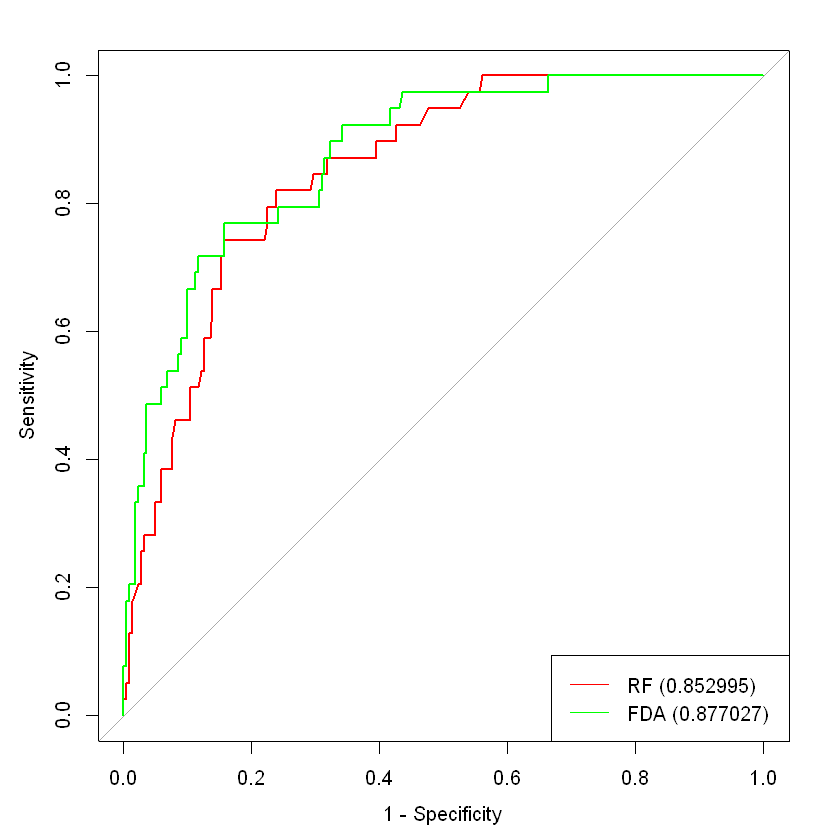

In [23]:
# plot ROC
plot(rfROC, legacy.axes=TRUE, col="red")
plot(FDAROC, legacy.axes=TRUE, add=T, col="green")
legend( x="bottomright", c(sprintf("RF (%f)", rfROC$auc), sprintf("FDA (%f)", FDAROC$auc)), 
       col=c("red", "green"), lty=c(1,1,1) )

In [24]:
# random upsampling to fix the group sizes to the largest group in the dataframe
set.seed(111)
upSampleTrain = upSample( x=training[,-51] , y=training$RESP, yname="RESP" )
print( table( upSampleTrain$RESP ) )


 Yes   No 
1562 1562 


In [25]:
# same models with upSample dataframe
# RF
set.seed(123)
rfFit_us = train( RESP ~ ., data=upSampleTrain, method="rf", 
                 trControl=ctrl, ntree=500, tuneLength=5, metric="ROC" )

+ Fold1: mtry=  2 
- Fold1: mtry=  2 
+ Fold1: mtry= 31 
- Fold1: mtry= 31 
+ Fold1: mtry= 60 
- Fold1: mtry= 60 
+ Fold1: mtry= 89 
- Fold1: mtry= 89 
+ Fold1: mtry=118 
- Fold1: mtry=118 
+ Fold2: mtry=  2 
- Fold2: mtry=  2 
+ Fold2: mtry= 31 
- Fold2: mtry= 31 
+ Fold2: mtry= 60 
- Fold2: mtry= 60 
+ Fold2: mtry= 89 
- Fold2: mtry= 89 
+ Fold2: mtry=118 
- Fold2: mtry=118 
+ Fold3: mtry=  2 
- Fold3: mtry=  2 
+ Fold3: mtry= 31 
- Fold3: mtry= 31 
+ Fold3: mtry= 60 
- Fold3: mtry= 60 
+ Fold3: mtry= 89 
- Fold3: mtry= 89 
+ Fold3: mtry=118 
- Fold3: mtry=118 
+ Fold4: mtry=  2 
- Fold4: mtry=  2 
+ Fold4: mtry= 31 
- Fold4: mtry= 31 
+ Fold4: mtry= 60 
- Fold4: mtry= 60 
+ Fold4: mtry= 89 
- Fold4: mtry= 89 
+ Fold4: mtry=118 
- Fold4: mtry=118 
+ Fold5: mtry=  2 
- Fold5: mtry=  2 
+ Fold5: mtry= 31 
- Fold5: mtry= 31 
+ Fold5: mtry= 60 
- Fold5: mtry= 60 
+ Fold5: mtry= 89 
- Fold5: mtry= 89 
+ Fold5: mtry=118 
- Fold5: mtry=118 
Aggregating results
Selecting tuning parameters
Fi

In [26]:
# FDA
set.seed(123)
fdaFit_us = train( RESP ~ ., data=upSampleTrain, method="fda", 
                  tuneLength=10, trControl=ctrl, metric="ROC" )

+ Fold1: nprune= 2, degree=1 
- Fold1: nprune= 2, degree=1 
+ Fold1: nprune= 3, degree=1 
- Fold1: nprune= 3, degree=1 
+ Fold1: nprune= 5, degree=1 
- Fold1: nprune= 5, degree=1 
+ Fold1: nprune= 7, degree=1 
- Fold1: nprune= 7, degree=1 
+ Fold1: nprune= 8, degree=1 
- Fold1: nprune= 8, degree=1 
+ Fold1: nprune=10, degree=1 
- Fold1: nprune=10, degree=1 
+ Fold1: nprune=12, degree=1 
- Fold1: nprune=12, degree=1 
+ Fold1: nprune=13, degree=1 
- Fold1: nprune=13, degree=1 
+ Fold1: nprune=15, degree=1 
- Fold1: nprune=15, degree=1 
+ Fold1: nprune=17, degree=1 
- Fold1: nprune=17, degree=1 
+ Fold2: nprune= 2, degree=1 
- Fold2: nprune= 2, degree=1 
+ Fold2: nprune= 3, degree=1 
- Fold2: nprune= 3, degree=1 
+ Fold2: nprune= 5, degree=1 
- Fold2: nprune= 5, degree=1 
+ Fold2: nprune= 7, degree=1 
- Fold2: nprune= 7, degree=1 
+ Fold2: nprune= 8, degree=1 
- Fold2: nprune= 8, degree=1 
+ Fold2: nprune=10, degree=1 
- Fold2: nprune=10, degree=1 
+ Fold2: nprune=12, degree=1 
- Fold2: n

In [27]:
# compare estimated sensitivity and specificity for methods on upSample training set
res = matrix(data=c(mean(rfFit_us$resample$ROC), mean(rfFit_us$resample$Spec), mean(rfFit_us$Eesample$Sens),
                    mean(fdaFit_us$resample$ROC), mean(fdaFit_us$resample$Spec), mean(fdaFit_us$resample$Sens)),
             nrow=2, ncol=3, byrow=T )
res = data.frame( res )
rownames(res) = c("RF", "FDA" )
colnames(res) = c("AUC", "Spec", "Sens" )
print(res)

Warning message in mean.default(rfFit_us$Eesample$Sens):
"argument is not numeric or logical: returning NA"

          AUC      Spec      Sens
RF  0.9985238 0.9155075        NA
FDA 0.8690034 0.7093553 0.8450807


In [28]:
# true sensitivity and specificity for upScale sets on the evaluation set
evalResults = data.frame( RESP = evaluation$RESP ) # put in the truth
evalResults$RF = predict( rfFit_us, newdata=evaluation, type="prob" )[,1]
evalResults$FDA = predict( fdaFit_us, newdata=evaluation, type="prob" )[,1]

In [29]:
# ROC results
library(pROC)
rfROC = roc(evalResults$RESP, evalResults$RF, levels=rev(levels(evalResults$RESP)))
print(rfROC)
FDAROC = roc(evalResults$RESP, evalResults$FDA, levels=rev(levels(evalResults$RESP)))
print(FDAROC)

Setting direction: controls < cases



Call:
roc.default(response = evalResults$RESP, predictor = evalResults$RF,     levels = rev(levels(evalResults$RESP)))

Data: evalResults$RF in 223 controls (evalResults$RESP No) < 39 cases (evalResults$RESP Yes).
Area under the curve: 0.8429


Setting direction: controls < cases



Call:
roc.default(response = evalResults$RESP, predictor = evalResults$FDA,     levels = rev(levels(evalResults$RESP)))

Data: evalResults$FDA in 223 controls (evalResults$RESP No) < 39 cases (evalResults$RESP Yes).
Area under the curve: 0.8773


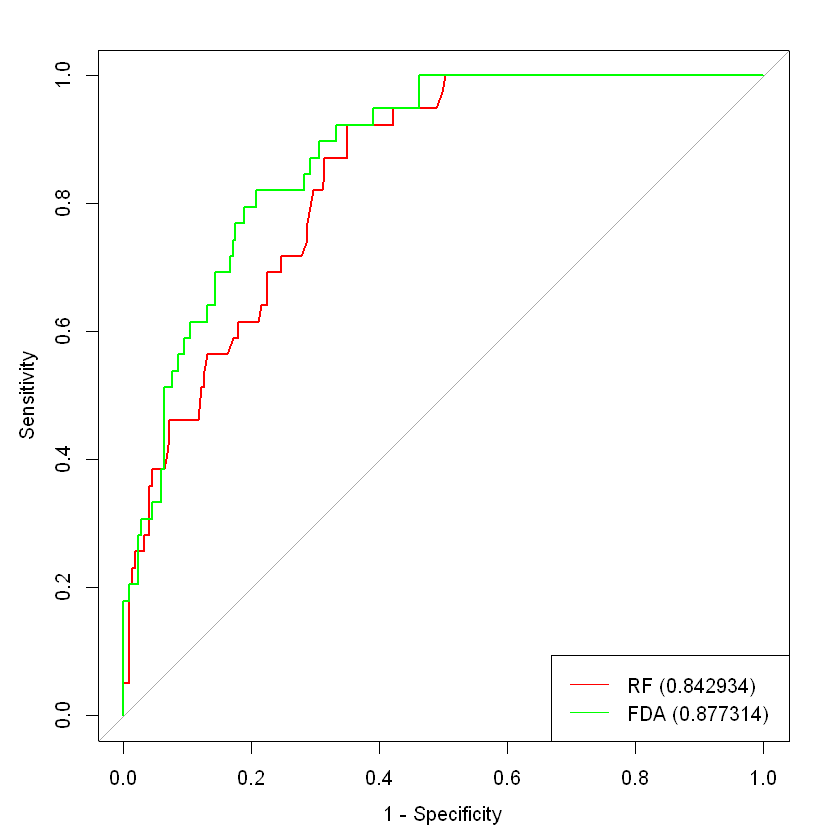

In [30]:
# plot ROC
plot(rfROC, legacy.axes=TRUE, col="red")
plot(FDAROC, legacy.axes=TRUE, add=T, col="green")
legend( x="bottomright", c(sprintf("RF (%f)", rfROC$auc), sprintf("FDA (%f)", FDAROC$auc)), 
       col=c("red", "green"), lty=c(1,1,1) )

### Review (2):
Initial traincontrol and specific parameters:  

           AUC  |    Spec   |    Sens
    RF:  0.8239 | 0.9641456 | 0.2350842
    FDA: 0.8446 | 0.9404727 | 0.3674074

    ROC:
    RF  | 85.3%
    FDA | 87.7%

UpSampled:  

           AUC  |   Spec |    Sens
    RF:  0.9985 | 0.9155 | NA
    FDA: 0.8690 | 0.7093 | 0.8450

    ROC: 
    RF  | 84.3% 
    FDA | 87.7%

### Conclusion:
In conclusion, the FDA model performed better than RF for predicting Response. The classification models used defined control parameters for its traincontrol and the metrics of ROC. The ROC plots that show the AUC of ~85% for RF and ~87% for FDA initially, and ~84% for RF and ~87% for FDA after upsampling. The sensitivity also was NA for RF after upsampled.